In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [22]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
from collections import defaultdict

In [23]:
def circular_detection_assignment(image, diameterRange):
    radRange = [int(d/2) for d in diameterRange]
    rangeMin = radRange[0]
    rangeMax = radRange[1]
    row, column = image.shape

    accumulatorMatrix = np.zeros([2*row, 2*column, rangeMax + 1])
    for rad in radRange:
        for r in range(row):
            for c in range(column):
                if image[r][c] != 0:
                    for theta in range(0, 360):
                        b = c - rad * np.sin(theta*math.pi / 180)
                        a = r - rad * np.cos(theta*math.pi / 180)
                        accumulatorMatrix[int(a), int(b), int(rad)] += 1  # voting

    accumulatorMatrix_ = np.sum(accumulatorMatrix, axis = 2)
    accumulatorMatrix_ = ((accumulatorMatrix_ - accumulatorMatrix_.min()) *
                           (1.0/(accumulatorMatrix_.max() - accumulatorMatrix_.min())* 255)) # normalization

    accumulatorImage = accumulatorMatrix_[:row + 1,:column + 1]
    max_value = np.max(accumulatorMatrix)
    indices = np.argwhere(accumulatorMatrix > (max_value * 0.7))

    return indices, accumulatorImage

In [24]:
def hough_assignment_3(path):
  originalImg = cv2.imread(path)
  image = cv2.imread(path)
  edgeDetected = cv2.Canny(image, 50, 150)

  indices, accumulatorImage = circular_detection_assignment(edgeDetected, [15,25]) # circles 15-25
  
  for r , c , rad in indices:
      cv2.circle(image, (c, r), rad, (0,0,255), thickness=1, lineType=8, shift=0)

  print('Original image')
  cv2_imshow(originalImg)
  
  print()
  print('Accumulator image and input image with objects detected in given range of diameters.')
  cv2_imshow(image)
  cv2_imshow(accumulatorImage.astype(np.uint8))
  cv2.waitKey(0)


Original image


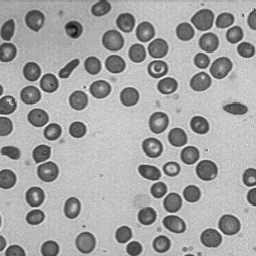


Accumulator image and input image with objects detected in given range of diameters.


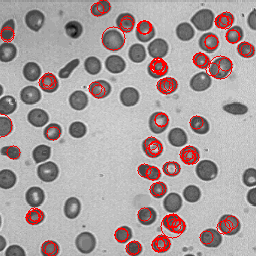

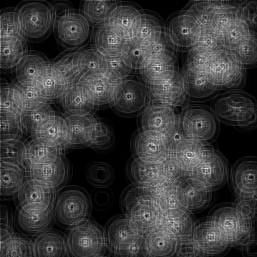

In [25]:
path = '/content/drive/MyDrive/3_hough/blood.png'
hough_assignment_3(path)

Original image


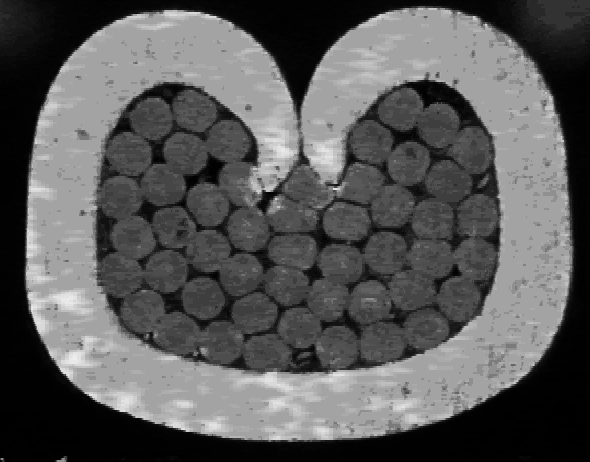


Accumulator image and input image with objects detected in given range of diameters.


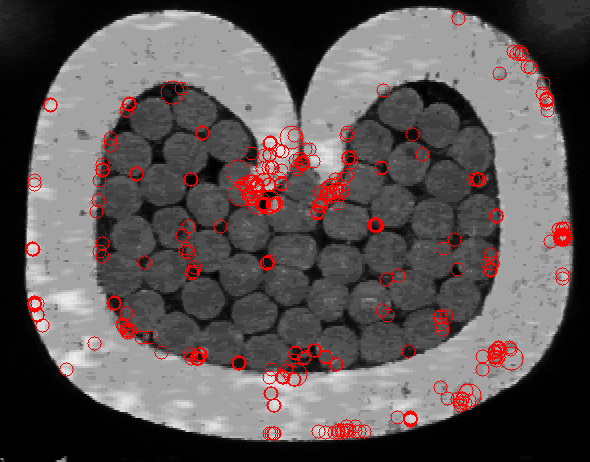

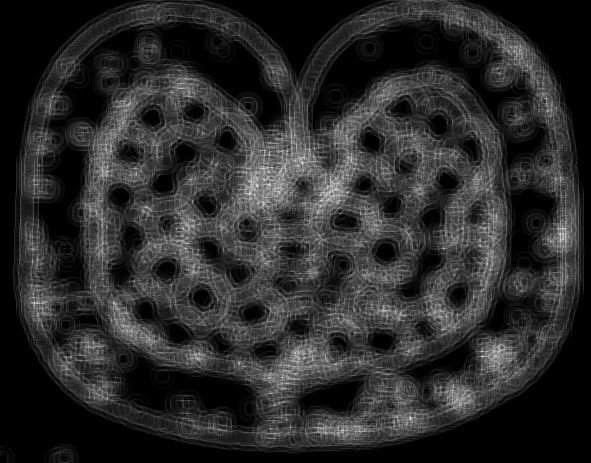

In [26]:
path = '/content/drive/MyDrive/3_hough/cable.png'
hough_assignment_3(path)

Original image


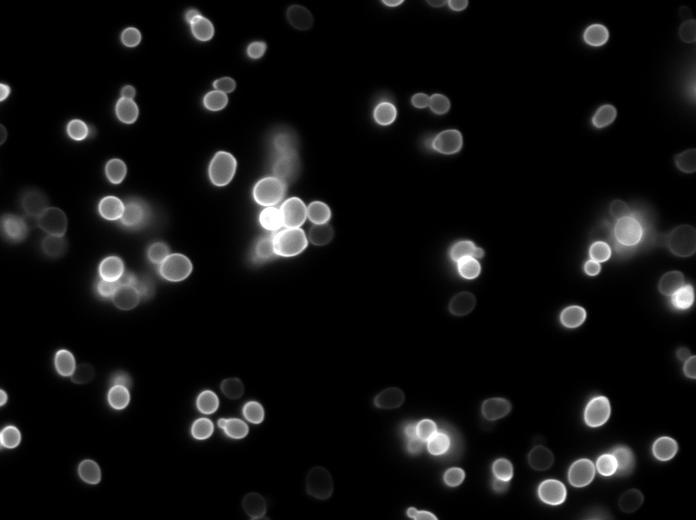


Accumulator image and input image with objects detected in given range of diameters.


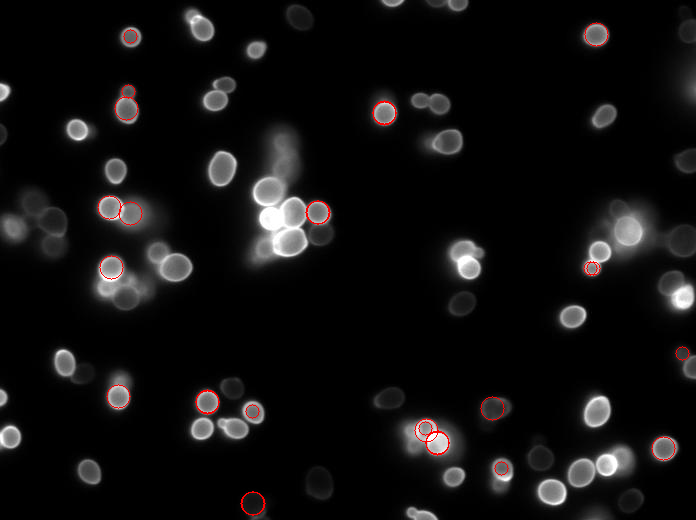

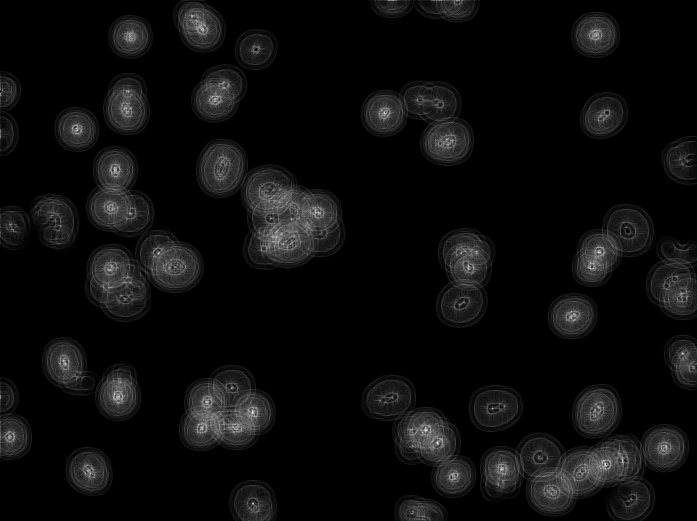

In [27]:
path = '/content/drive/MyDrive/3_hough/cells.png'
hough_assignment_3(path)

Original image


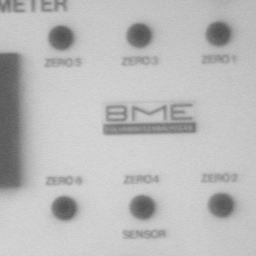


Accumulator image and input image with objects detected in given range of diameters.


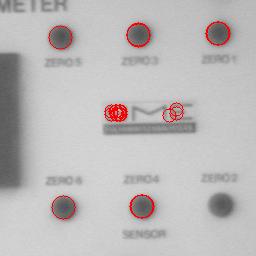

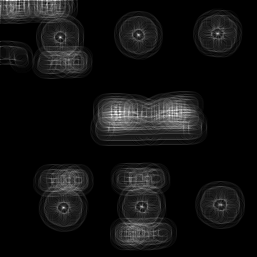

In [28]:
path = '/content/drive/MyDrive/3_hough/circles.png'
hough_assignment_3(path)